In [1]:
from astropy.io import fits
import os
from pathlib import Path
import random
import pandas as pd
import numpy as np
import subprocess

In [2]:
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

In [3]:
DES_SVA_TILES = pd.read_pickle("/data/scratch/des/sva_map.pickle")
DES_DIR = Path(
    "/nfs/turbo/lsa-regier/scratch/gapatron/desdr-server.ncsa.illinois.edu/despublic/dr2_tiles/"
)
DES_SUBDIR = np.random.choice(DES_SVA_TILES)
DES_SUBDIR

'DES0503-4957'

In [4]:
psf_dir = f"/nfs/turbo/lsa-regier/scratch/gapatron/psf-models/dr2_tiles/{DES_SUBDIR}"
print(os.path.exists(psf_dir))

True


In [5]:
from utils import image_gen_utils

image_gen_utils.create_des_catalog(des_subdir=DES_SUBDIR, data_path="/home/kapnadak/bliss/case_studies/galaxy_clustering/data", file_suffix="000")

In [6]:
for band in ['g', 'r', 'i', 'z']:
    print(f"Creating band {band}")
    image_gen_utils.galsim_render(des_subdir=DES_SUBDIR, data_path="/home/kapnadak/bliss/case_studies/galaxy_clustering/data", file_suffix="000", band=band)

Creating band g
Reading config file /home/kapnadak/bliss/case_studies/galaxy_clustering/data_generation/custom-single-image-galsim.yaml
These fields are not (directly) processed by the config processing.
Start file 0 = /home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_g.fits
Using 32 processes for stamp processing
File 0 = /home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_g.fits: time = 216.673497 sec
Done building files
Creating band r
Reading config file /home/kapnadak/bliss/case_studies/galaxy_clustering/data_generation/custom-single-image-galsim.yaml
These fields are not (directly) processed by the config processing.
Start file 0 = /home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_r.fits
Using 32 processes for stamp processing
File 0 = /home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_r.fits: time = 212.316208 sec
Done building files
Creating band i
Reading config fil

In [7]:
files = os.listdir(DES_DIR / Path(DES_SUBDIR))
file_r = [f for f in files if f.endswith("r_nobkg.fits.fz")][0]
file_g = [f for f in files if f.endswith("g_nobkg.fits.fz")][0]
file_i = [f for f in files if f.endswith("i_nobkg.fits.fz")][0]
image_des_r = fits.getdata(f"{DES_DIR}/{DES_SUBDIR}/{file_r}")
image_des_g = fits.getdata(f"{DES_DIR}/{DES_SUBDIR}/{file_g}")
image_des_i = fits.getdata(f"{DES_DIR}/{DES_SUBDIR}/{file_i}")

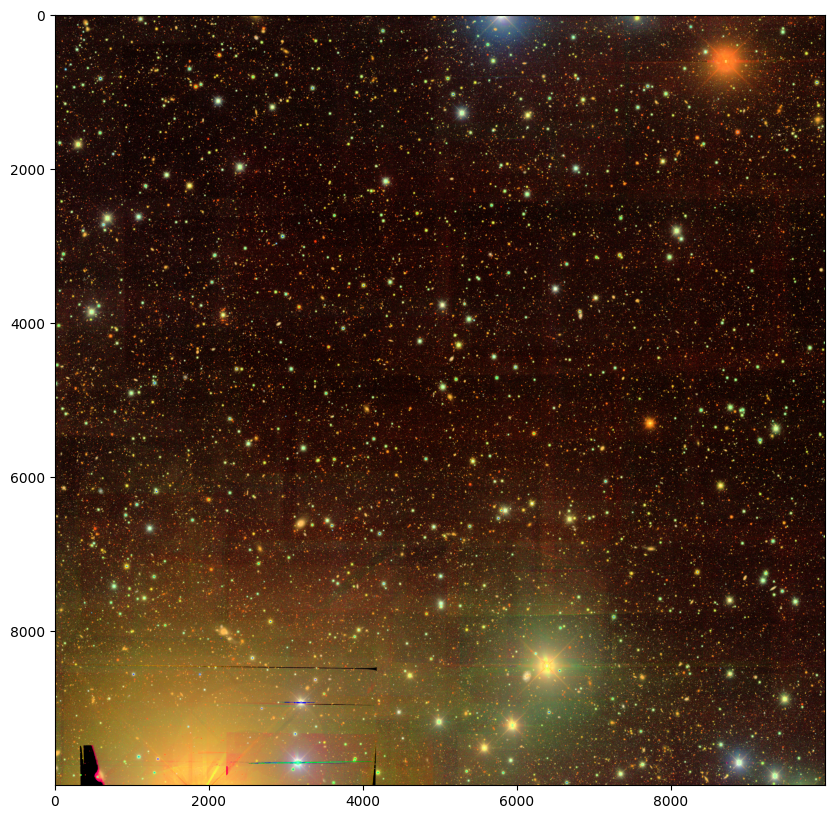

In [8]:
rgb_default = make_lupton_rgb(image_des_i, image_des_r, image_des_g)
plt.figure(figsize=(10,10))
plt.imshow(rgb_default)

In [9]:
image_galsim_r = fits.getdata("/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_r.fits")
image_galsim_g = fits.getdata("/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_g.fits")
image_galsim_i = fits.getdata("/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_i.fits")

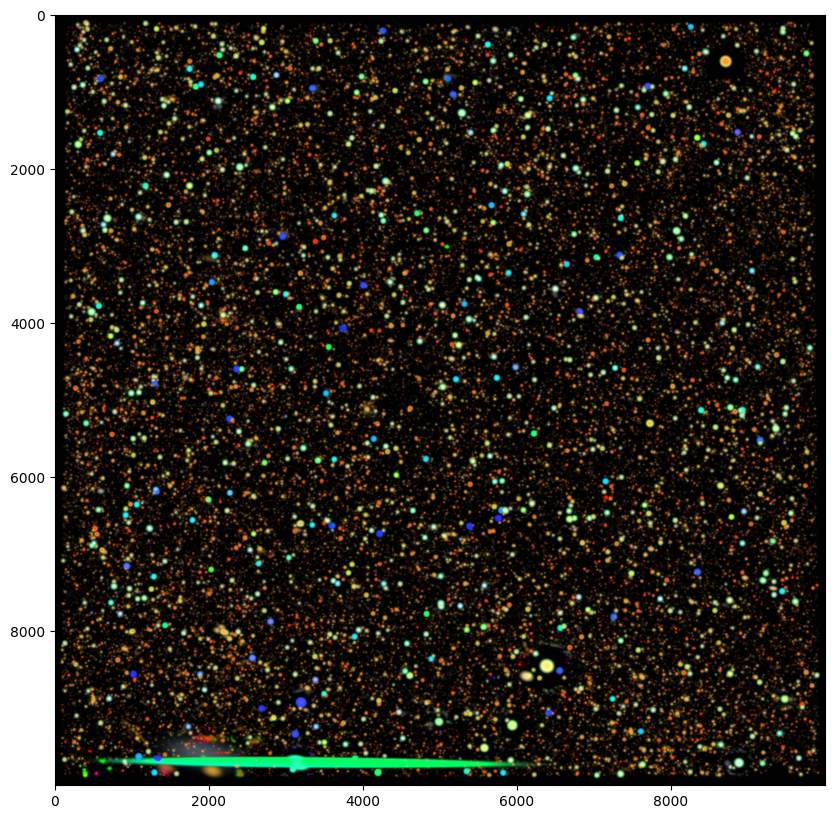

In [10]:
rgb_default = make_lupton_rgb(image_galsim_i, image_galsim_r, image_galsim_g)
plt.figure(figsize=(10,10))
plt.imshow(rgb_default)

In [11]:
residual_r = image_des_r - image_galsim_r
residual_g = image_des_g - image_galsim_g
residual_i = image_des_i - image_galsim_i

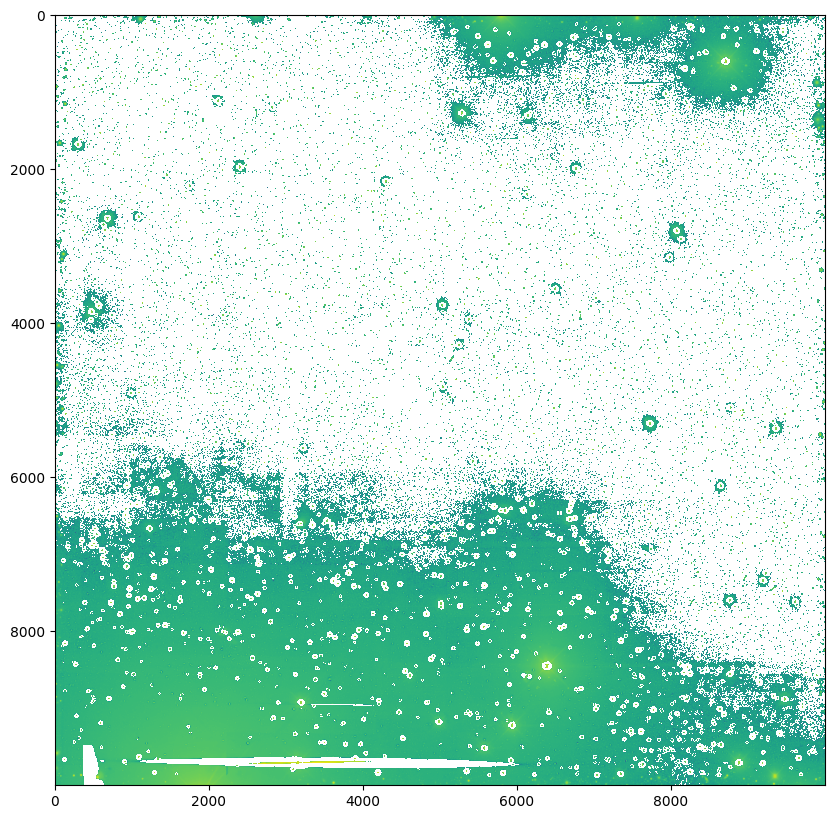

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(residual_r, norm=LogNorm())